In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
# Load the actual data from the CSV file
actual_df = pd.read_csv('/home/raj/Rajarshi/Term Project/Sir_code_dart/data/SBIN.NS_day_2023.csv')

# Load the predicted data from the CSV file
predicted_df = pd.read_csv('/home/raj/Rajarshi/Term Project/rajarshi_code/itransformer_ensemble/ensemble_prediction_itransformer_model.csv')

# Convert the 'Date' columns to a consistent datetime format for both DataFrames
actual_df['Date'] = pd.to_datetime(actual_df['Date'], errors='coerce')
predicted_df['Date'] = pd.to_datetime(predicted_df['Date'], errors='coerce')

# Drop rows with invalid dates (NaT)
actual_df = actual_df.dropna(subset=['Date'])
predicted_df = predicted_df.dropna(subset=['Date'])

# Merge the DataFrames on the 'Date' column, keeping only the matching dates
merged_df = pd.merge(predicted_df, actual_df, on='Date', how='inner')

# Print the matched dates for verification
print("Matched Dates:\n", merged_df['Date'])

Matched Dates:
 0   2023-01-02
1   2023-01-03
2   2023-01-04
3   2023-01-05
4   2023-01-06
5   2023-01-09
6   2023-01-10
Name: Date, dtype: datetime64[ns]


In [15]:

# Calculate accuracy metrics
mae = mean_absolute_error(merged_df['Close'], merged_df['Predicted Value'])
mse = mean_squared_error(merged_df['Close'], merged_df['Predicted Value'])
r2 = r2_score(merged_df['Close'], merged_df['Predicted Value'])
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = np.mean(np.abs((merged_df['Close'] - merged_df['Predicted Value']) / merged_df['Close'])) * 100  # Mean Absolute Percentage Error

# Print accuracy metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 8.215122455357134
Mean Squared Error (MSE): 77.47645190452012
Root Mean Squared Error (RMSE): 8.802070887269661
R-squared (R²): -1.5529902416230619
Mean Absolute Percentage Error (MAPE): 1.40%


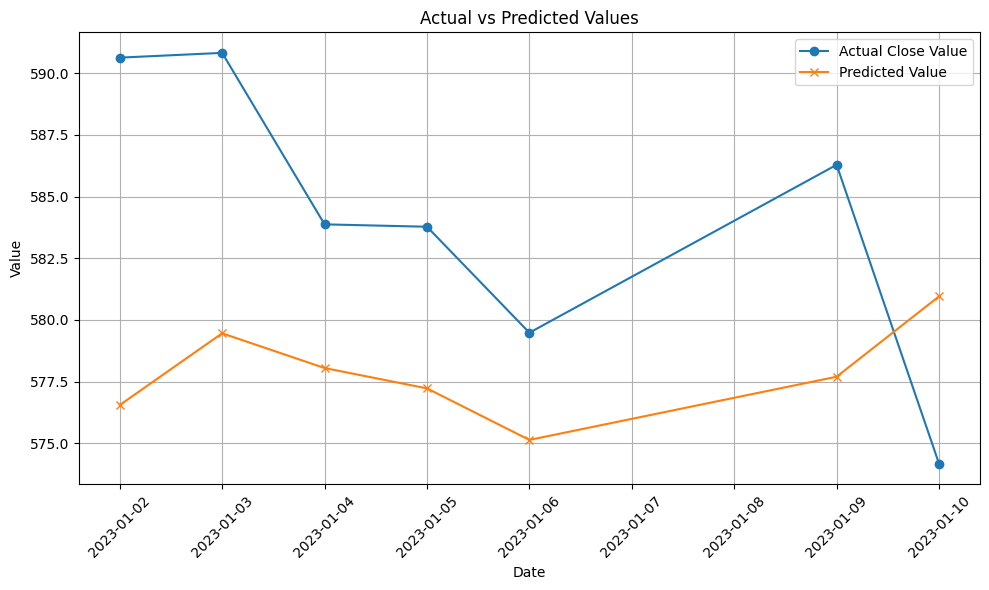

In [16]:

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(merged_df['Date'], merged_df['Close'], label='Actual Close Value', marker='o')
plt.plot(merged_df['Date'], merged_df['Predicted Value'], label='Predicted Value', marker='x')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the date labels for better readability
plt.tight_layout()
plt.show()
